# Machine Learning Assignment
This demonstrates how changing the depth of a Multilayer Perceptron affects classification performance using the `make_moons` dataset.


In [14]:
#importing libraries what we needed

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

sns.set(style="whitegrid")


In [15]:
# Create the moons dataset
X, y = make_moons(n_samples=2000, noise=0.25, random_state=42)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)

X_train.shape, X_test.shape


((1500, 2), (500, 2))


#### This function creates a contour plot showing how the MLP divides the feature space.


In [16]:
def plot_decision_boundary(model, X, y, title):
    ax = plt.gca()

    # Decision boundary grid
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 400),
                         np.linspace(y_min, y_max, 400))
    
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # Plot contour on the EXISTING figure
    ax.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')

    # Plot scatter
    ax.scatter(X[:, 0], X[:, 1], c=y, s=20, cmap='coolwarm', edgecolor='k')
    
    ax.set_title(title)


#### We create networks with different numbers of hidden layers to compare their behavior.


In [17]:
models = {
    "MLP-1 layer": MLPClassifier(hidden_layer_sizes=(16,), 
                                 activation='relu', 
                                 max_iter=1000, random_state=42),

    "MLP-2 layers": MLPClassifier(hidden_layer_sizes=(32, 16), 
                                  activation='relu', 
                                  max_iter=1000, random_state=42),

    "MLP-3 layers": MLPClassifier(hidden_layer_sizes=(64, 32, 16), 
                                  activation='relu', 
                                  max_iter=1000, random_state=42),

    "MLP-5 layers (deep)": MLPClassifier(hidden_layer_sizes=(128,128,128,128,128), 
                                         activation='relu', 
                                         max_iter=1000, random_state=42)
}


## Train Models  
#### Each MLP is trained on the dataset and we store accuracy and loss curves.

###  What this step does
Here we train four MLP models with different depths.  
The goal is to compare how the number of hidden layers changes:
- Learning ability
- Overfitting
- Generalisation

In [18]:
results = {}

for name, model in models.items():
    model.fit(X_train, y_train)

    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)

    train_acc = accuracy_score(y_train, train_pred)
    test_acc = accuracy_score(y_test, test_pred)

    results[name] = {
        "model": model,
        "train_acc": train_acc,
        "test_acc": test_acc,
        "loss_curve": model.loss_curve_
    }

results


{'MLP-1 layer': {'model': MLPClassifier(hidden_layer_sizes=(16,), max_iter=1000, random_state=42),
  'train_acc': 0.9453333333333334,
  'test_acc': 0.932,
  'loss_curve': [np.float64(0.6743582595063169),
   np.float64(0.6578182597206467),
   np.float64(0.6432573155344645),
   np.float64(0.6290870801085201),
   np.float64(0.6167572467173644),
   np.float64(0.6047032930215689),
   np.float64(0.5936601172705096),
   np.float64(0.5830515846759239),
   np.float64(0.5731457380934935),
   np.float64(0.5634402136410694),
   np.float64(0.5540047921552904),
   np.float64(0.5447299581862797),
   np.float64(0.5360257800266439),
   np.float64(0.5274263730366661),
   np.float64(0.5190193802690902),
   np.float64(0.5107808198207979),
   np.float64(0.502890696235351),
   np.float64(0.4954316045873007),
   np.float64(0.48792840043864694),
   np.float64(0.4806835667793299),
   np.float64(0.4736740752897087),
   np.float64(0.4668547292416263),
   np.float64(0.46033454898964093),
   np.float64(0.453806334

## Accuracy Comparison  
#### It display the training and testing accuracy for all MLP depths.
- The 1-layer MLP underfits → lower accuracy  
- The 3-layer MLP performs best → balanced complexity  
- The 5-layer MLP shows slight overfitting → high train accuracy, lower test accuracy  


In [19]:
import pandas as pd

df_results = pd.DataFrame({
    "Model": list(results.keys()),
    "Train Accuracy": [round(results[m]["train_acc"], 3) for m in results],
    "Test Accuracy": [round(results[m]["test_acc"], 3) for m in results]
})

df_results



,Model,Train Accuracy,Test Accuracy
0,MLP-1 layer,0.945,0.932
1,MLP-2 layers,0.951,0.938
2,MLP-3 layers,0.949,0.944
3,MLP-5 layers (deep),0.953,0.936


## Loss Curves  
#### Plot how each model's loss decreased over iterations.

Deeper networks tend to:
- Converge slower
- Have more unstable training
- Sometimes get stuck in local minima


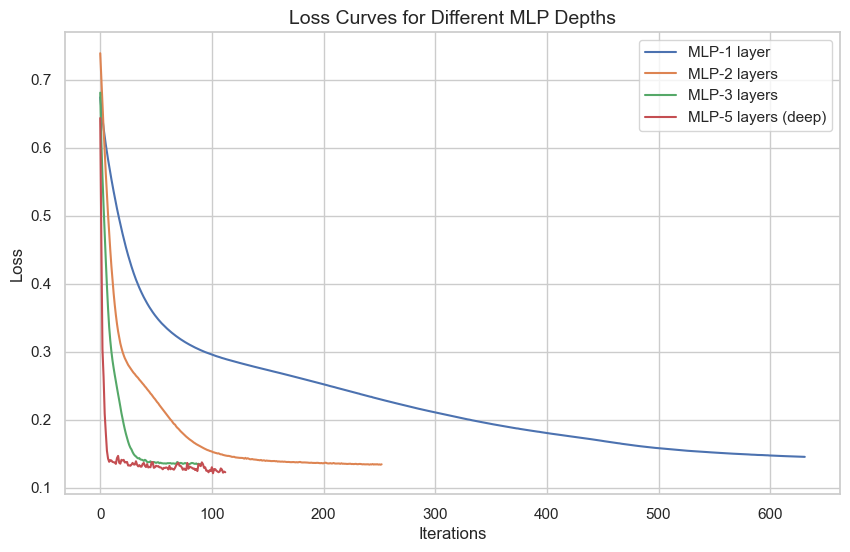

In [20]:
plt.figure(figsize=(10,6))

for name in results:
    plt.plot(results[name]["loss_curve"], label=name)

plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.title("Loss Curves for Different MLP Depths", fontsize=14)
plt.legend()
plt.savefig("loss_curves.png", dpi=300, bbox_inches='tight')
plt.show()


## Decision Boundaries  
 Visualizing how deeper models create more complex decision boundaries.
- The decision boundary becomes more flexible with deeper networks.  
- However, the deepest network becomes overly complex, which is a sign of overfitting.


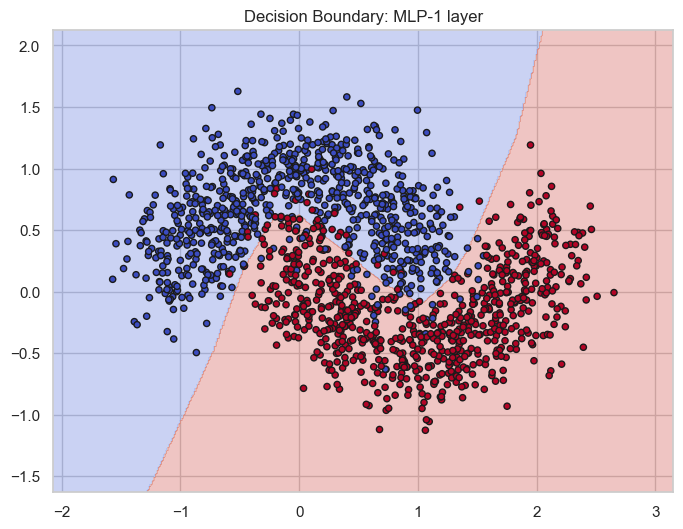

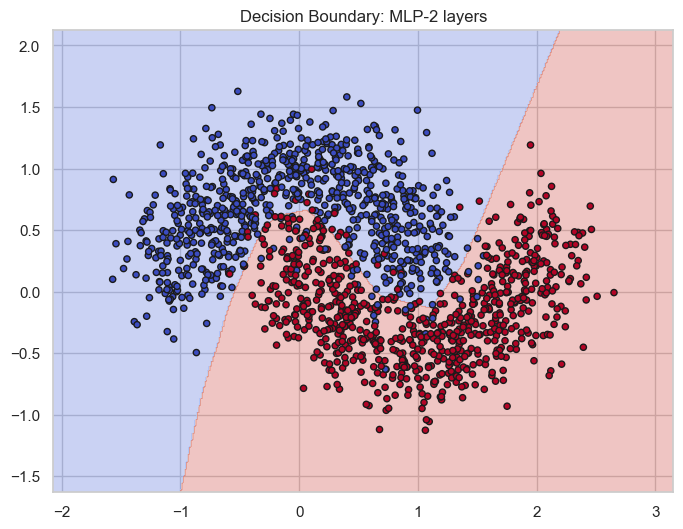

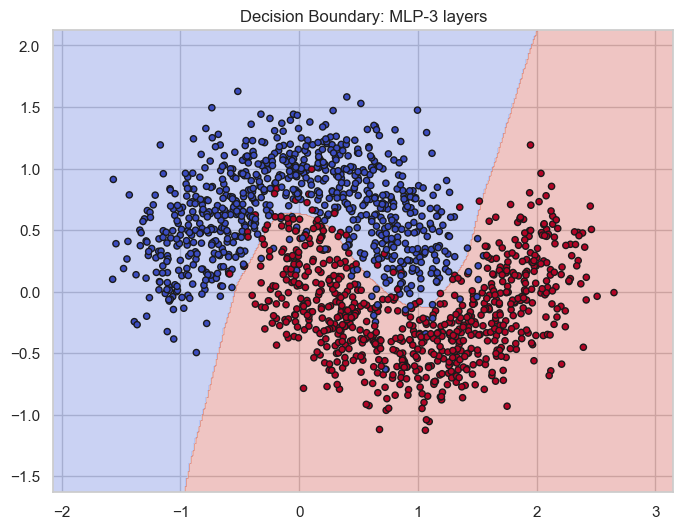

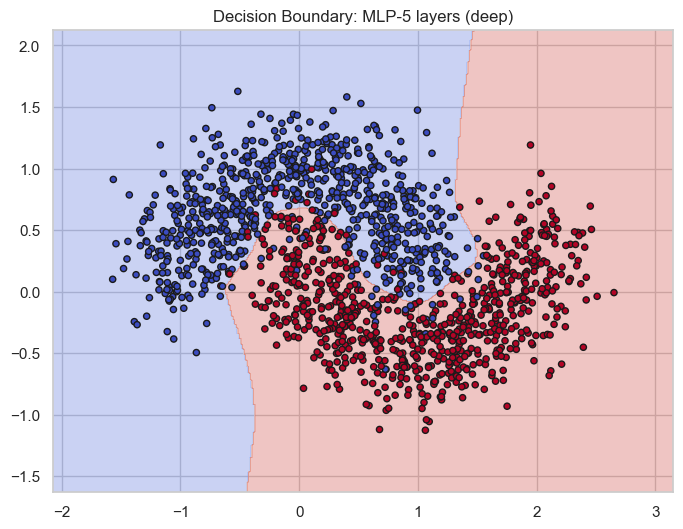

In [21]:
for name in results:
    plt.figure(figsize=(8, 6))
    plot_decision_boundary(results[name]["model"], X_train, y_train, 
                           f"Decision Boundary: {name}")
    plt.savefig(f"decision_boundary_{name.replace(' ','_')}.png", 
                dpi=300, bbox_inches='tight')
    plt.show()


### Why parameter count matters
More depth → more parameters → risk of overfitting + more compute.
This supports our earlier findings from the accuracy comparison.


In [22]:
def count_params(model):
    total = 0
    for w in model.coefs_:
        total += w.size
    for b in model.intercepts_:
        total += b.size
    return total

for name in results:
    print(name, ":", count_params(results[name]["model"]), "parameters")


MLP-1 layer : 65 parameters
MLP-2 layers : 641 parameters
MLP-3 layers : 2817 parameters
MLP-5 layers (deep) : 66561 parameters
